# Segmentation client 


***Objectif est de rassembler les clients en groupes d’individus ayant des caractéristiques similaires ou mêmes profils.
Stratégie qui permet de fidéliser un groupe spécifique de clients, d’attirer de nouveaux clients***

Base de donnée disponible sur Kaggle



## Segmentation client par K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kmodes



### Base de modélisation

In [8]:
#Lecture des tables
db = pd.read_excel("/Users/jalis/Downloads/customer.xlsx" )

#### Exploration de la table

In [12]:
db.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,23,15,39
1,Male,25,15,81
2,Female,23,16,6
3,Female,26,16,77
4,Female,24,17,40


In [47]:
#valeurs manquantes
db.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Analyse Exploratoire des Données


**Analyse exploratoire**

In [13]:
#Description de la table
db.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,43.245000,60.560000,50.200000
std,11.495902,26.264721,25.823522
min,22.000000,15.000000,1.000000
25%,41.000000,41.500000,34.750000
50%,44.000000,61.500000,50.000000
75%,47.250000,78.000000,73.000000
max,65.000000,137.000000,99.000000


**Analyser la distribution de la variable Age**

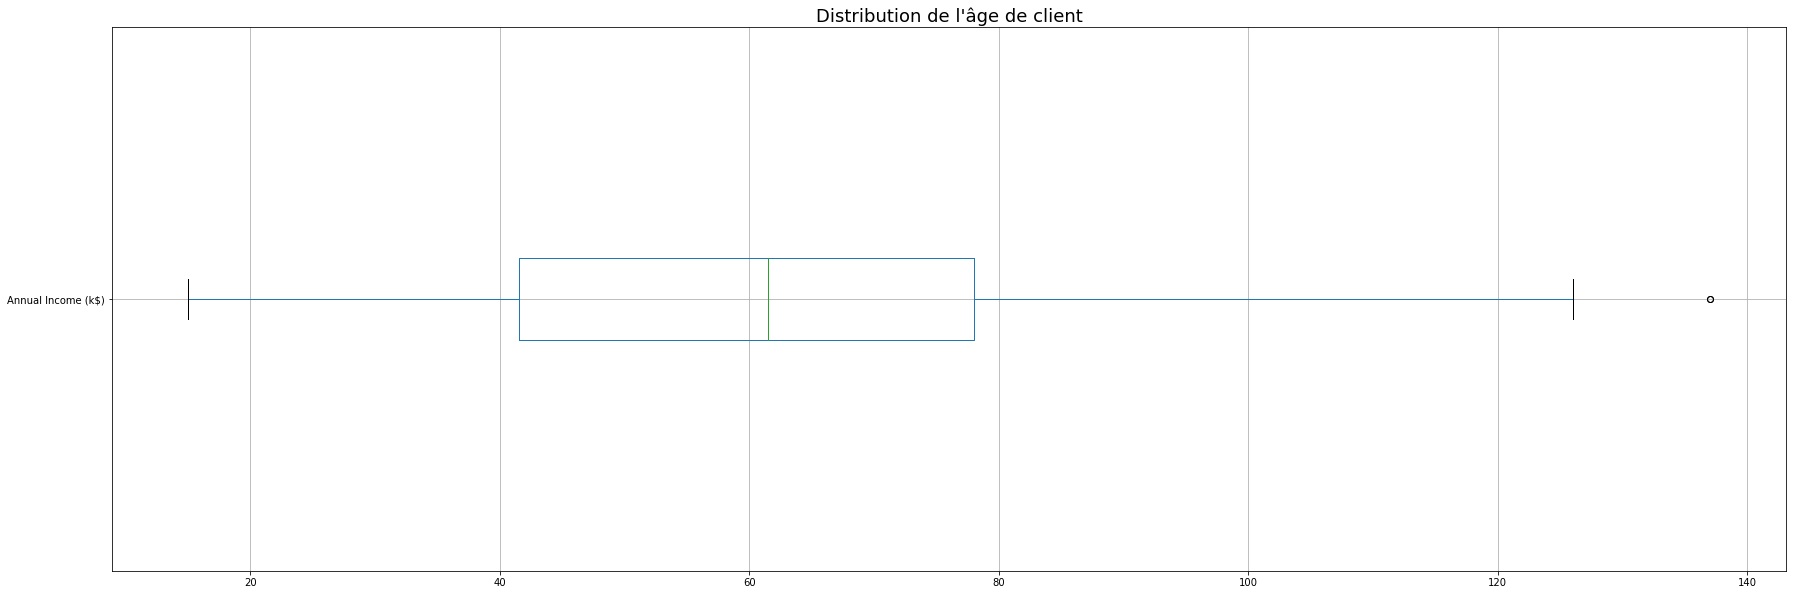

In [17]:
#Distribution
plt.figure(figsize=(30, 10))
db.boxplot(column='Annual Income (k$)', vert = False )
plt.title("Distribution de l'âge de client", fontsize = 18)
plt.show()



50% gagne en dessous de 60K
Le revenu minimal est de 15k

Analyse de l'âge du client


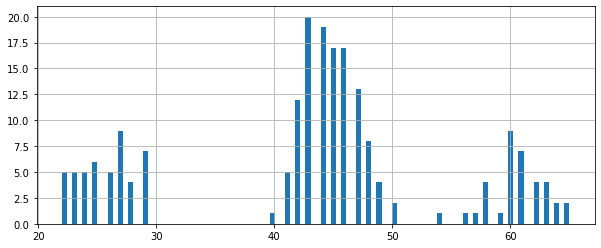

In [18]:
plt.figure(figsize=(10, 4))

print(color.BOLD + "Analyse de l'âge du client" + color.END)

#Distribution
db['Age'].hist(bins = 100);


3 grosses fourchettes d'âge. 20-30ans/40-50ans/+50ans

**Analyser la distribution de la variable Gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

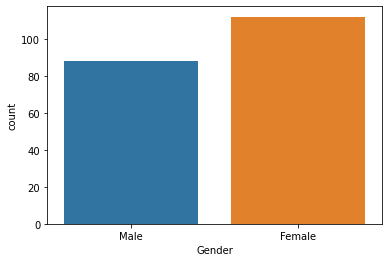

In [19]:
sns.countplot(x="Gender", hue=None, data=db)

**Analyse bivariée**

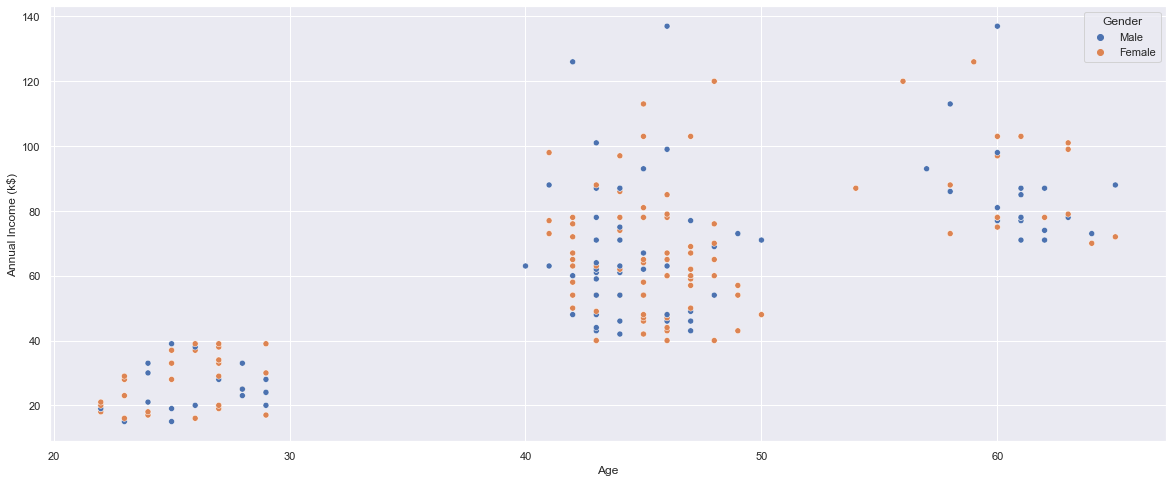

In [52]:
plt.figure(figsize=(20, 8))
sb.scatterplot(x=db['Age'], y=db['Annual Income (k$)'], hue=db['Gender']);

3 classes différentes, ceux qui ont entre 20 et 30 ans gagnes moins que les autres. Les hommes gagnent plus que les femmes.

In [53]:
table = pd.pivot_table(db, index='Gender', aggfunc='mean')
table

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,42.473214,59.250000,51.526786
Male,44.227273,62.227273,48.511364


La moyenne d'age des femmes est inférieure à celle des hommes. La moyenne des revenus des hommes est supérieure à celle des femmes mais les femmes dépensent plus que les hommes.

**Analyse des correlations**

<AxesSubplot:>

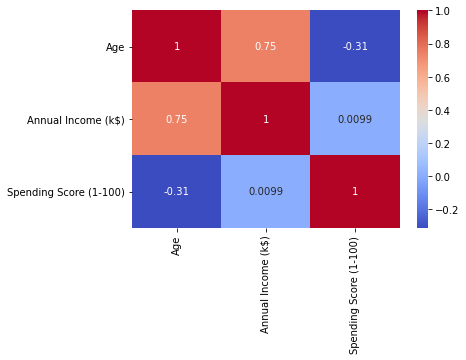

In [20]:
sns.heatmap(db.corr(), annot=True, cmap="coolwarm")



Un lien entre l'age et le revenu annuel

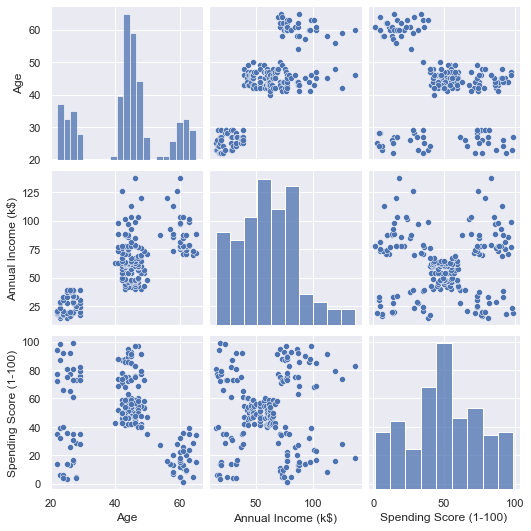

In [55]:
sb.set()
sb.pairplot(db);

on peut voir une corrélation entre le revenu et l'age et entre les dépenses et le revenu.

# 5. Construction du modèle

##  Data Processing

#### base de modélisation

In [23]:
db_mod = db.copy()

#### standardisation

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Le but étant de normaliser les variables

In [25]:
### 1.2 Analyse Exploratoire des Données
db_mod.iloc[:, 1:] = scaler.fit_transform(db_mod.iloc[:, 1:].to_numpy())

db_mod

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.765482,-1.738999,-0.434801
1,Male,-1.591070,-1.738999,1.195704
2,Female,-1.765482,-1.700830,-1.715913
3,Female,-1.503864,-1.700830,1.040418
4,Female,-1.678276,-1.662660,-0.395980
...,...,...,...,...
195,Female,0.414664,2.268791,1.118061
196,Female,1.373928,2.497807,-0.861839
197,Male,-0.108571,2.497807,0.923953
198,Male,1.461133,2.917671,-1.250054


## Modelisation

#### Importation de la librairie de K-Means

In [26]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore', category = FutureWarning)

#### Identification de la variable catégorielle

In [27]:
#identification de la variable quali,0 car c'est la colonne 
catColumnsPos = [0]
#catColumnsPos = [db_mod.columns.get_loc(col) for col in list(db_mod.select_dtypes('object').columns)]


#### Base de modélisation 

In [29]:
dfMatrix= db_mod.to_numpy()
dfMatrix

array([['Male', -1.7654816285106592, -1.7389991930659485,
        -0.43480147996914814],
       ['Male', -1.5910700080107176, -1.7389991930659485,
        1.195704069915157],
       ['Female', -1.7654816285106592, -1.7008297638941763,
        -1.7159129834496736],
       ['Female', -1.5038641977607468, -1.7008297638941763,
        1.0404178270690327],
       ['Female', -1.6782758182606885, -1.6626603347224038,
        -0.3959799192576171],
       ['Female', -1.2422467670108344, -1.6626603347224038,
        1.0015962663575015],
       ['Female', -1.6782758182606885, -1.6244909055506316,
        -1.7159129834496736],
       ['Female', -1.85268743876063, -1.6244909055506316,
        1.700384359165061],
       ['Male', -1.5910700080107176, -1.5863214763788591,
        -1.832377665584267],
       ['Female', -1.85268743876063, -1.5863214763788591,
        0.8463100235113773],
       ['Male', -1.85268743876063, -1.5863214763788591,
        -1.405340497757425],
       ['Female', -1.41665838751

#### Estimation du modèle

In [33]:
# Modèle avec 5 clusters
kprototype = KPrototypes(n_jobs = -1, 
                         n_clusters = 5, 
                         init = 'Huang', 
                         random_state = 0)

# Estimation du modèle
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=uint16)

#### Output du modèle

In [35]:
#Définition d'une étiquette pour stocker les classes ou groupe de clients du modèle
labels = kprototype.labels_
# Affecation
db_mod = db.copy()

db_mod['labels'] = labels
db_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,Male,23,15,39,1
1,Male,25,15,81,0
2,Female,23,16,6,1
3,Female,26,16,77,0
4,Female,24,17,40,1


#### Interprétation des résultats

In [67]:
table = pd.pivot_table(db_mod, index='labels', aggfunc='mean')
table

,Age,Annual Income (k$),Spending Score (1-100)
labels,,,
0,25.913043,26.304348,78.565217
1,25.521739,26.304348,20.913043
2,60.638889,87.750000,17.583333
3,44.358974,86.538462,82.128205
4,44.974684,55.291139,49.569620


5 groupes différents avec des revenus moyens et des dépenses différentes

In [37]:
db_mod

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,Male,23,15,39,1
1,Male,25,15,81,0
2,Female,23,16,6,1
3,Female,26,16,77,0
4,Female,24,17,40,1
...,...,...,...,...,...
195,Female,48,120,79,3
196,Female,59,126,28,2
197,Male,42,126,74,3
198,Male,60,137,18,2


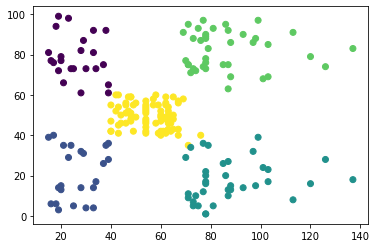

In [39]:
plt.scatter(x=db_mod.loc[:,'Annual Income (k$)'],
            y=db_mod.loc[:,'Spending Score (1-100)'],
            c=db_mod.loc[:,'labels'])
               

On distingue 5 groupes, le membres du premier groupe, gagne entre 20 et 40k/an et ont un score de 40%, ils dépensent 40% de leurs revenus. On peut voir tout à droite, un groupe caracterisé par des salaires élévés et des dépenses faibles.



In [49]:
print(kprototype.cluster_centroids_)

print(kprototype.n_iter_)

print(kprototype.cost_)

[['-1.5114473116955274' '-1.3075186893850437' '1.1011820090522988'
  'Female']
 ['-1.5455713244020377' '-1.3075186893850432' '-1.1369653606646668'
  'Female']
 ['1.5168481739535205' '1.0378267791804907' '-1.2662299052077726' 'Male']
 ['0.09714503657205108' '0.9915830476839201' '1.2395027537948333'
  'Female']
 ['0.15083845495705414' '-0.20110940757542448' '-0.02447232561309186'
  'Female']]
3
116.25384704067382


## Pertinence du modèle

In [66]:
# Modèle
cost = []
kprototype2 = KPrototypes(n_jobs = -1, 
                         n_clusters = 5, 
                         init = 'Huang', 
                         random_state = 0)

# Estimation du modèle
kprototype2.fit_predict(dfMatrix, categorical = catColumnsPos)


# Check the cost of the clusters created
kprototype2.cost_

116.25384704067382

L'inertie parait acceptable, on peut garder 5 clusters différents pour classer les clients.